## Introdução

Olá Cientista de Dados! 

Se você chegou até aqui, você já se familiarizou com o básico das bibliotecas seaborn, matplotlib e pandas! Esse conhecimento já garante a você a capacidade de realizar análises de dados e apresentar resultados de maneira simples e eficiente.

O próximo passo é ensiná-lo a dar a esses gráficos uma aparência extremamente profissional e que leve em conta as boas práticas da área de Visualização de Dados. Para isso, vamos apresentar um pequeno problema e a versão inicial da visualização com o conhecimento que temos e, depois, apresentamos o passo a passo com as boas práticas e como codifica-las, chegando a nossa versão final da visualização.

## Problema

Considere o seguinte cenário: Você é um cientista de dados encarregado de fazer uma análise em cima dos dados da população mundial. Os seus gráficos serão incorporados em uma apresentação PowerPoint.

O gráfico que você deve montar mostra a evolução no tamanho da população dos países do bloco econômico BRICS (Brasil, Russia, India, China e Africa do Sul), fazendo uma comparação com os Estados Unidos. Deve ser um gráfico de barras, onde cada barra irá representar um ano ou década.

O arquivo com os dados pode ser encontrado [aqui](https://media.githubusercontent.com/media/labeduc/datasets/main/worldpop/world_population.csv). Você pode fazer o download e subir no seu Google Colab ou carregar diretamente do endereço.

## Solução Passo a Passo

### Carregando Bibliotecas

O primeiro passo é sempre carregar as bibliotecas que vamos utilizar.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando dados

A próxima etapa é carregar os dados. Durante o curso, utilizamos um arquivo local para fazer isso. Hoje vamos exercitar uma pequena variação. Como explicamos anteriormente, todos os nossos conjuntos de dados estão em um repositório no GitHub -> [https://github.com/labeduc/datasets](https://github.com/labeduc/datasets). Ensinamos vocês a baixarem o repositório no seu computador e subir o arquivo que vocês vão trabalhar direto no Google Colab (que é temporário e precisar ser salvo lá cada vez que se abre o notebook) ou colocar no seu Google Drive e mapear o Google Drive no Google Colab.

Agora, vamos explorar uma capacidade da biblioteca pandas que é ler o arquivo direto da internet. O que fizemos foi ir até o Github e observar qual era a URL de download do arquivo que pretendemos usar. Copiamos e colocamos no primeiro parâmetro da função `read_csv()`.

In [3]:
worldpop = pd.read_csv('https://media.githubusercontent.com/media/labeduc/datasets/main/worldpop/world_population.csv')

Para verificar que temos os dados carregados, vamos pedir um sample de 2 linhas.

In [4]:
worldpop.sample(2)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
30,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09
71,146,GAB,Gabon,Libreville,Africa,2388992,2292573,2028517,1711105,1272935,983028,749078,597192,267668,8.9252,1.0204,0.03


Perfeito, temos os dados, e estamos prontos para prosseguir.

### Analisando os dados

A primeira coisa que podemos fazer nesta análise é descobrir quais são todos os campos de conjunto de dados, seus tipos de dados e se temos muitos campos vazios. 

In [5]:
worldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

A informação está bem estruturada: todos os campos tem valores, os campos númerico são de um tipo numérico, temos poucas categorias e são do tipo object, que basicamente diz que são texto.

Podemos perceber que estruturalmente, esse conjunto de dados tem um país por linha, com os anos sendo colunas. Em um cenário ideal, os nossos gráficos devem plotar a partir de uma única coluna de valor, e teríamos algum outro atributo para separa-los se for o caso.

Outro ponto a ser considerado é que precisamos apenas dos Estados Unidos e dos países do bloco econômico BRICS, então temos mais dados do que o necessário.

Isso significa que vamos fazer alguns ajustes nos nossos dados.

### Transformando os dados

Acompanhem explicações nos comentários.

In [44]:
# Primeira coisa é selecionar apenas as colunas que vamos utilizar
worldpop_sb = worldpop[["Country", 
                     "1970 Population",
                     "1980 Population",
                     "1990 Population",
                     "2000 Population",
                     "2010 Population",
                     "2015 Population",
                     "2020 Population",
                     "2022 Population"]]

# Em seguida, filtramos as linhas para pegar apenas US e os países do BRICS
worldpop_sb2 = worldpop_sb.query("Country in ('United States', 'Brazil', 'Russia', 'India', 'China', 'South Africa')")

# Fazemos a transformação das colunas de ano em linhas.
brics_us = worldpop_sb2.melt(id_vars='Country', var_name='Year', value_name='Population')

# Pedimos uma amostra para ver como nossos dados ficaram.
# Parece tudo certo, temos apenas paises do BRICS e US,
# no caso do Brasil, vemos agora duas linhas, uma para a
# informação do ano de 2022 e outra para 2015.
brics_us.sample(5)

,Country,Year,Population
42,Brazil,2022 Population,215313498
17,United States,1990 Population,248083732
14,India,1990 Population,870452165
30,Brazil,2015 Population,205188205
46,South Africa,2022 Population,59893885


Aí estão nossos dados, devidamente formatados. Vamos agora plotar o gráfico.

### Primeira Versão

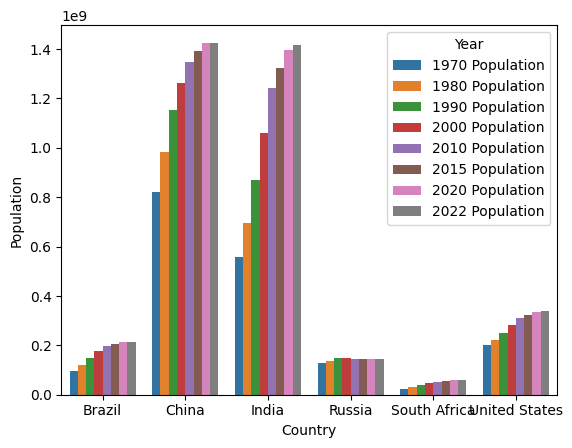

In [17]:
sns.barplot(brics_us, x='Country', y='Population', hue='Year')

plt.show()

E aí está nosso gráfico. A partir de agora, vamos passo a passo aplicando melhorias sucessivas.

### Passo 1 - Adicionando Títulos

Os gráficos precisam de títulos, preferencialmente um título que esclareça o significado do gráfico. Em nossas aulas anteriores, já haviamos adicionado títulos significativos em nossos gráficos e nos eixos também. Então, vamos apenas relembrar.

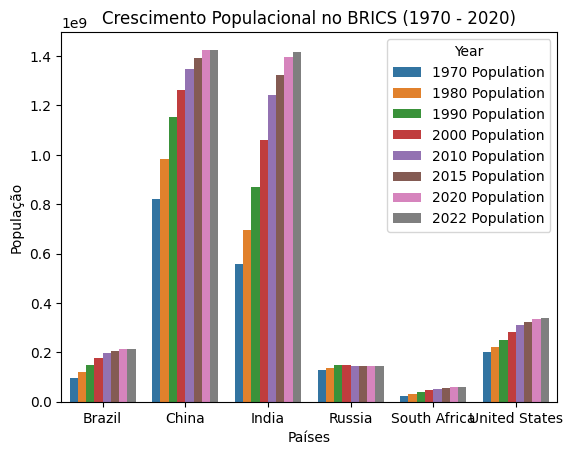

In [18]:
sns.barplot(brics_us, x='Country', y='Population', hue='Year')
# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('Países')
plt.ylabel('População')

plt.show()

### Passo 2 - Ajustando tamanho da imagem

Ao olharmos nosso gráfico, logo percebemos que os nomes dos países estão se sobrepondo no final. Para este e muitos outros ajustes, vamos introduzir a propriedade rcParams. Esta propriedade é um dicionário que armazena outras configurações. Você pode encontrar mais informaç!oes [aqui](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams).

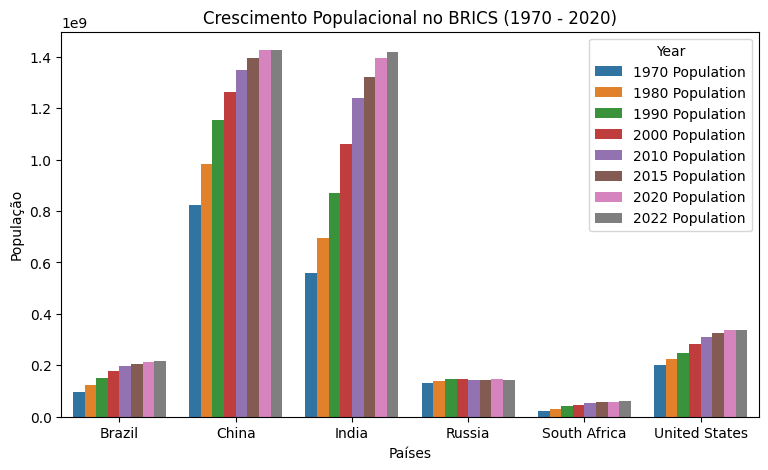

In [20]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('Países')
plt.ylabel('População')

plt.show()

Esse tamanho deixou as barras mais separadas, e agora conseguimos ver claramente todos os países.

### Passo 3 - Ajustando Qualidade da Imagem

Dentro do contexto de visualização online, nosso gráfico parece bom. Mas, se precisarmos exportar esse gráfico como imagem para usar em um powerpoint, por exemplo, veremos que a qualidade da imagem ficará ruim. Isso acontece porque o padrão do matplotlib é gerar imagens com resolução de 100dpi. Para exportar, normalmente é recomendado utilizar 300dpi. Vamos arrumar isso e ver como fica?

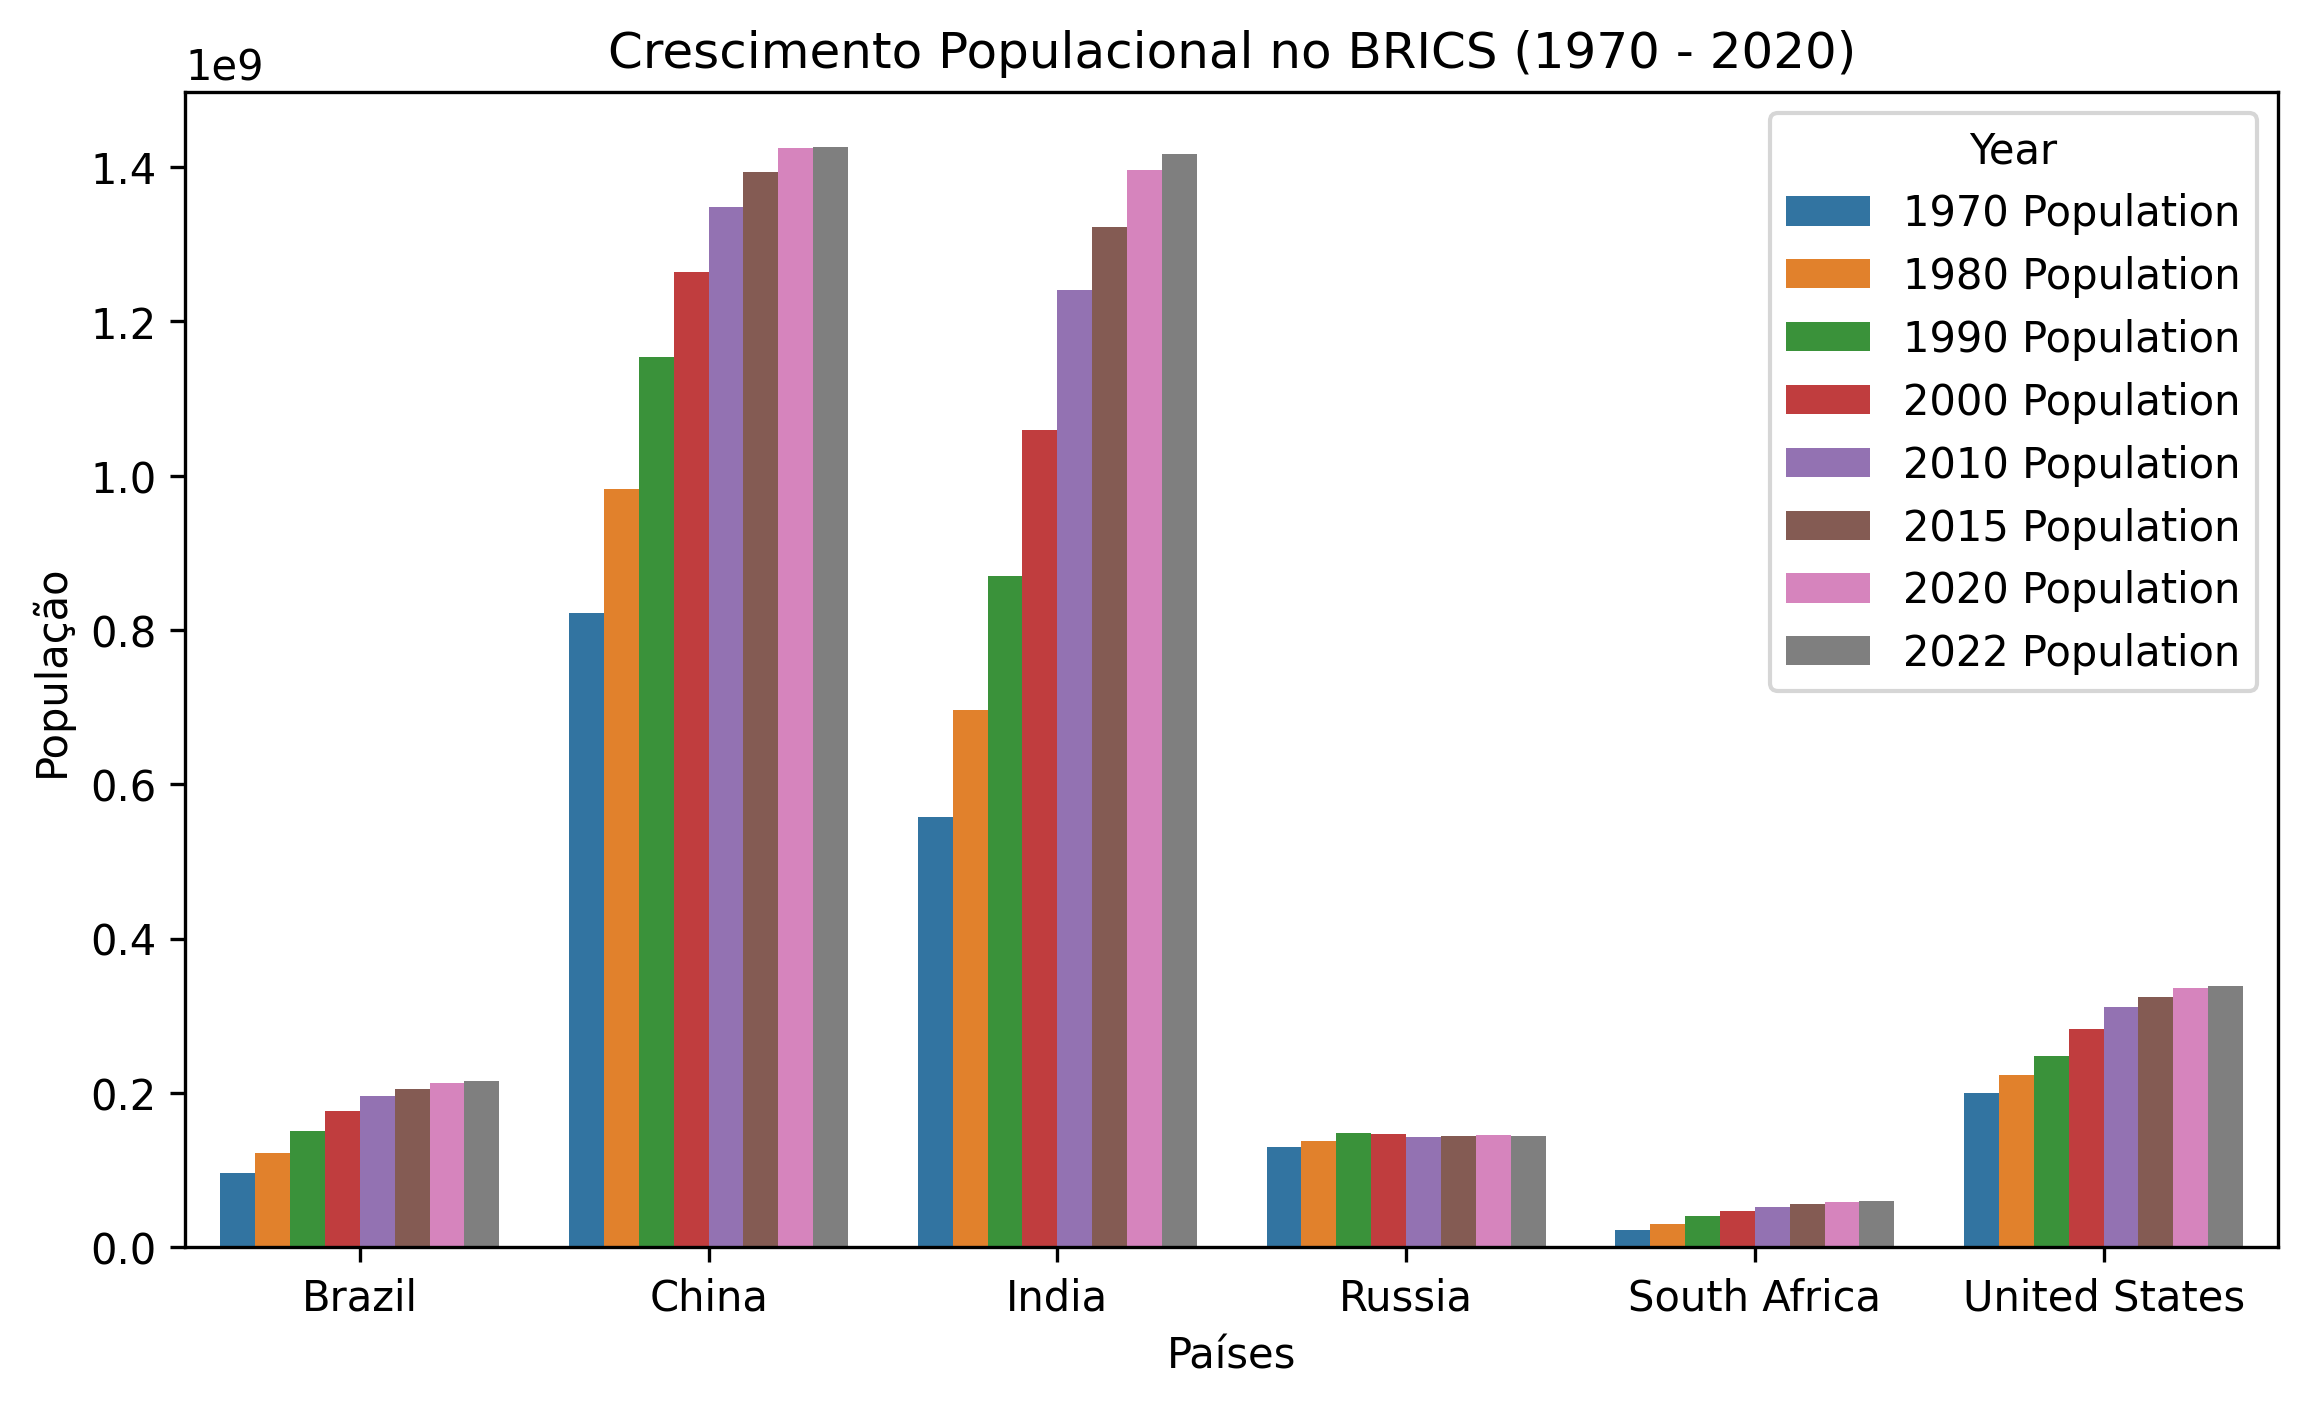

In [21]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('Países')
plt.ylabel('População')

plt.show()

### Passo 4 - Removendo o "Ruído" do Gráfico

De acordo com as boas práticas na área de visualização, uma boa visualização é limpa, ou seja, não possui elementos que não estejam relacionados aos dados. No gráfico acima, o box em torno do gráfico, a legenda com muito texto, aquela informação 1e9 perdida no gráfico são ruídos, que tiram a atenção das barras que são os dados.

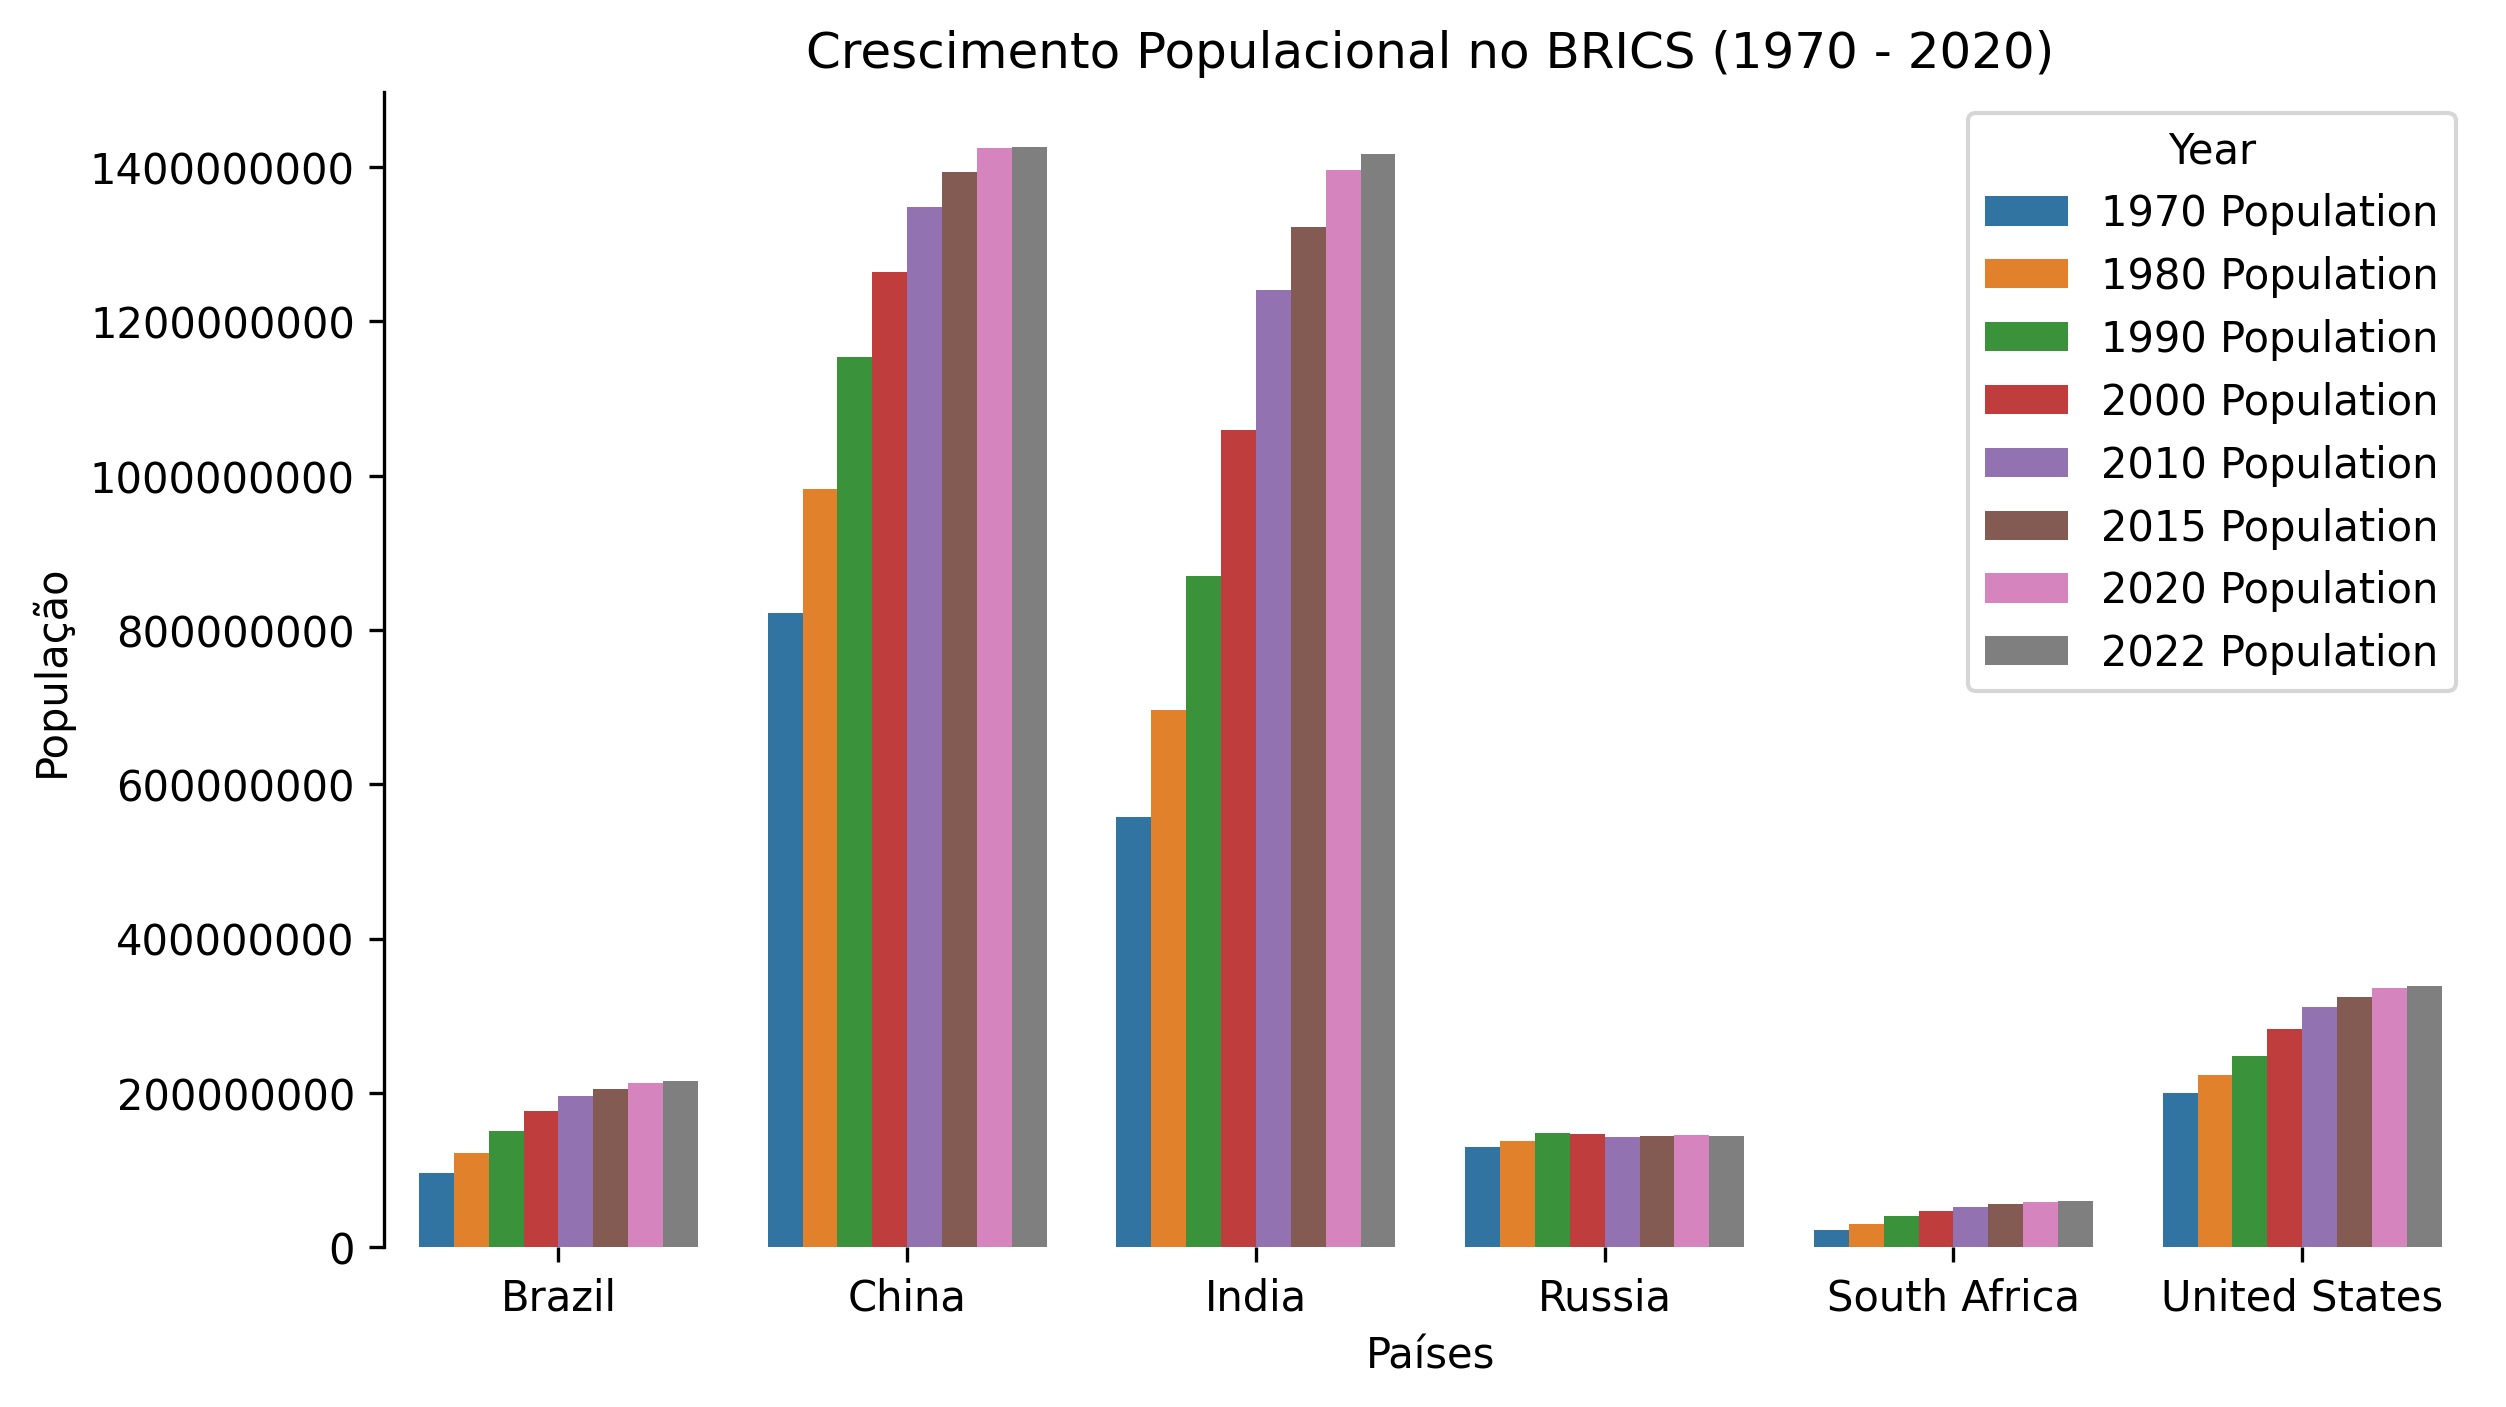

In [22]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.ticklabel_format(style="plain", useLocale=True)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('Países')
plt.ylabel('População')

plt.show()

Conseguimos deixar a imagem maior, removemos alguns elementos que adicionavam apenas ruído no gráfico. Mas observem que agora a formatação dos valores no eixo Y está estranho. Vamos corrigir?

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/823456077.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


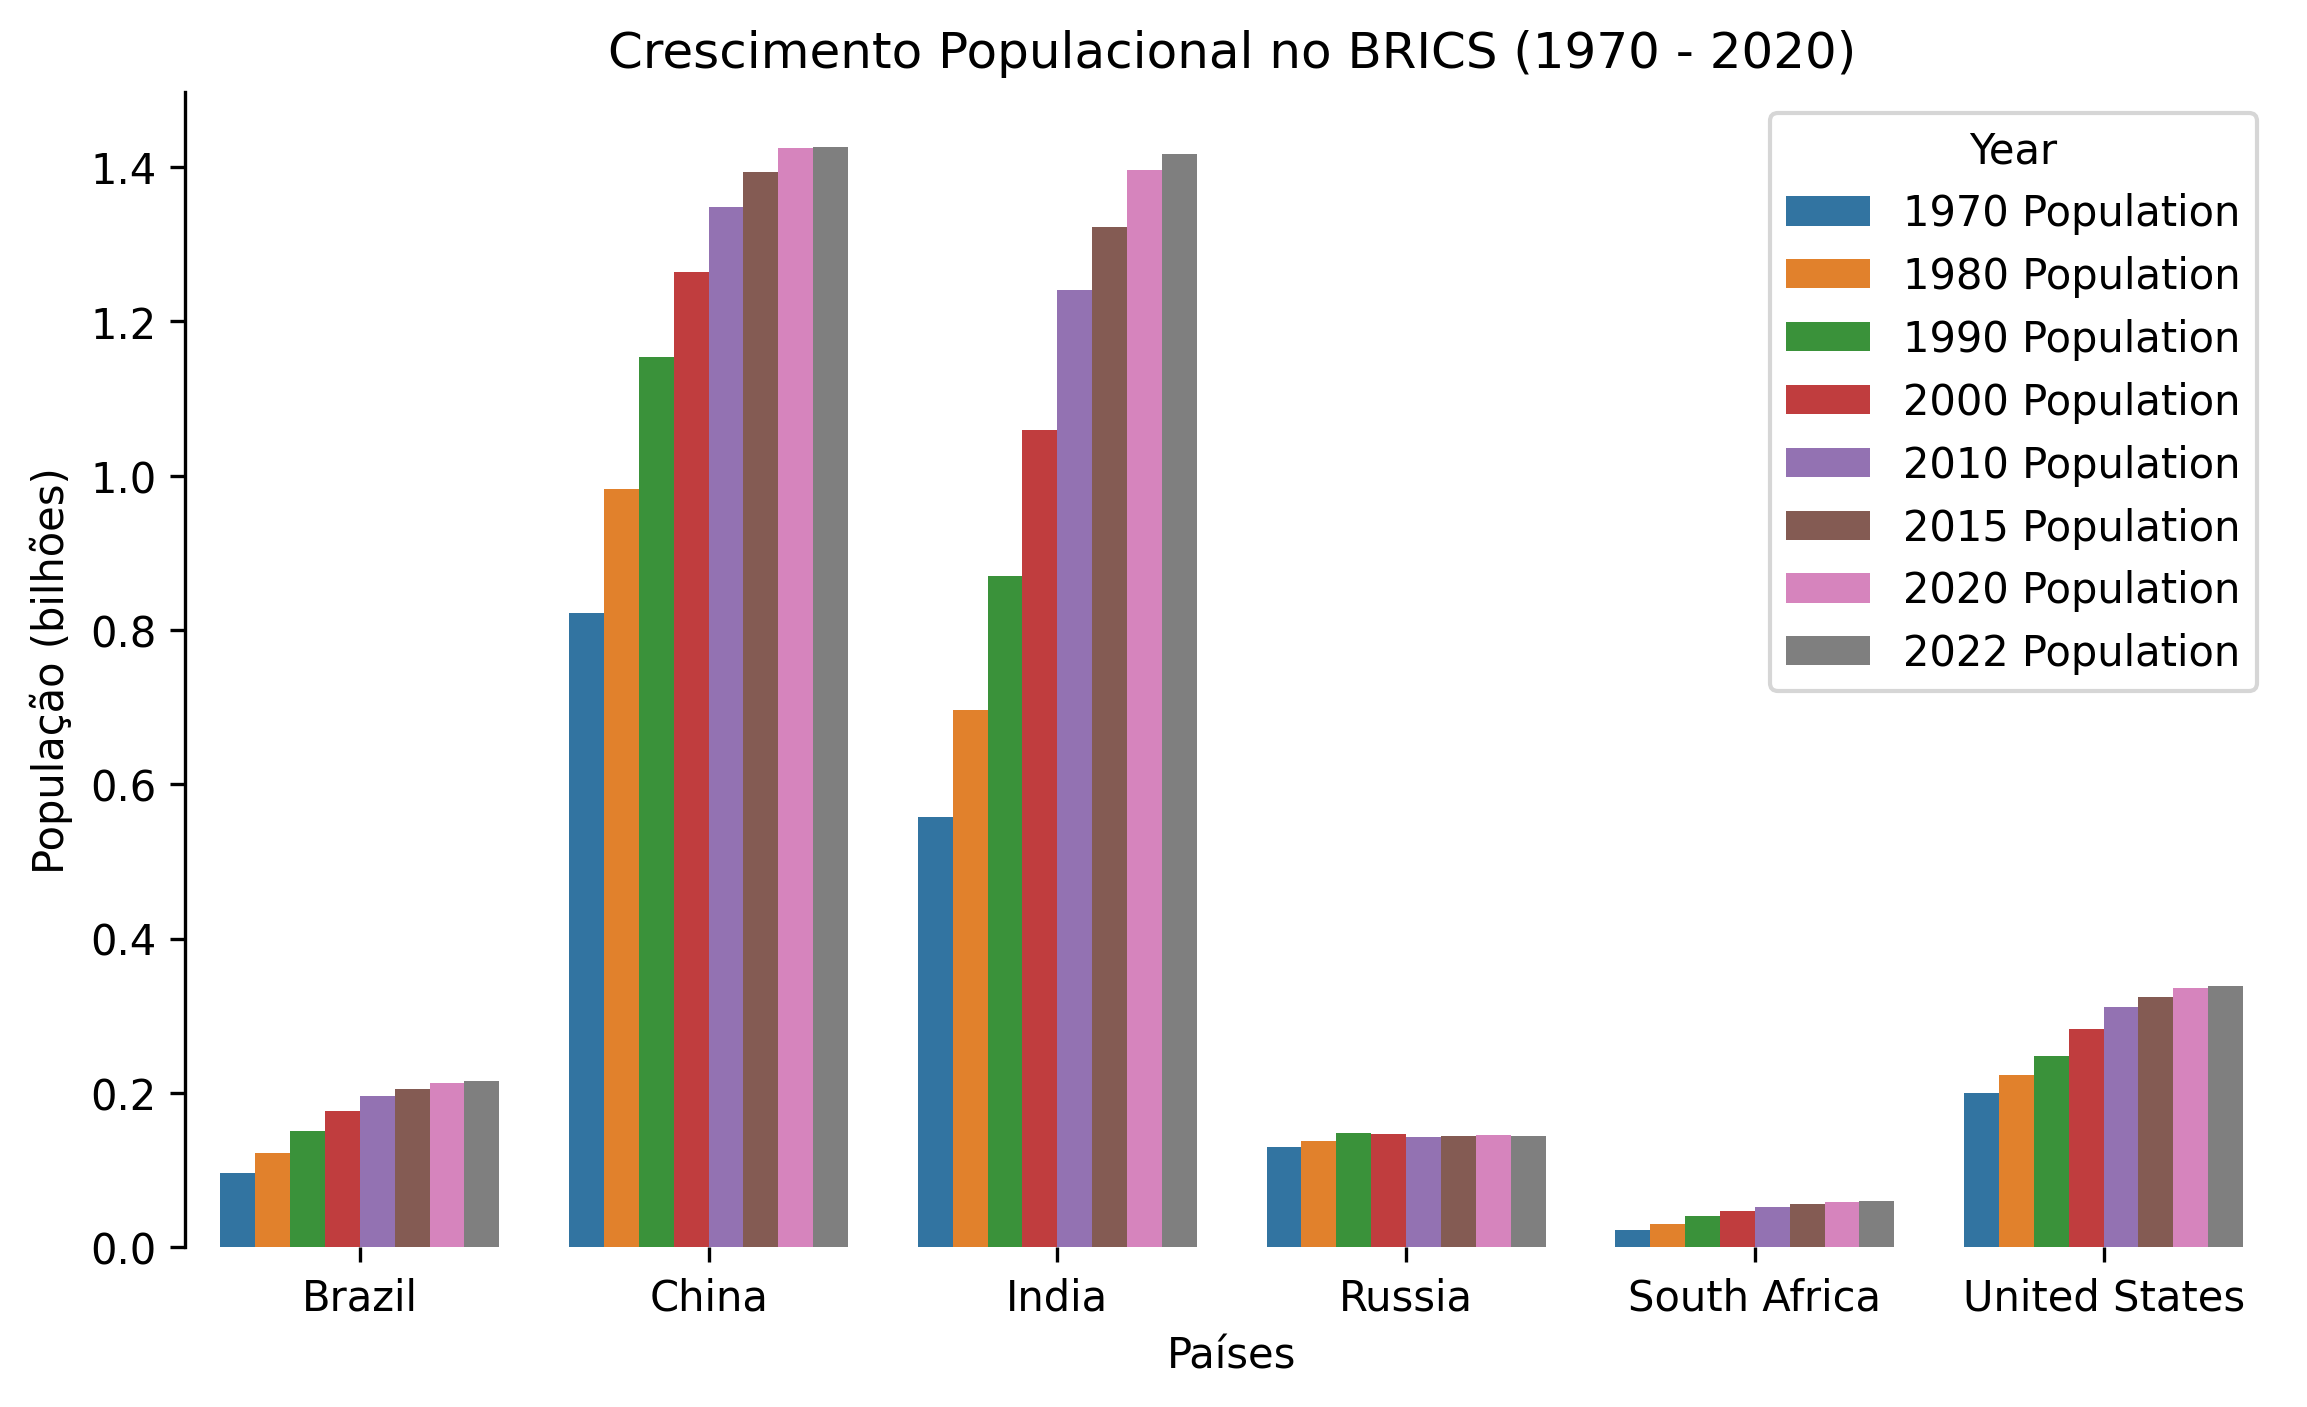

In [23]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.ticklabel_format(style="plain", useLocale=True)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('Países')
plt.ylabel('População (bilhões)')

plt.show()

Por último, vamos remover o label do eixo X.

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/1234354454.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


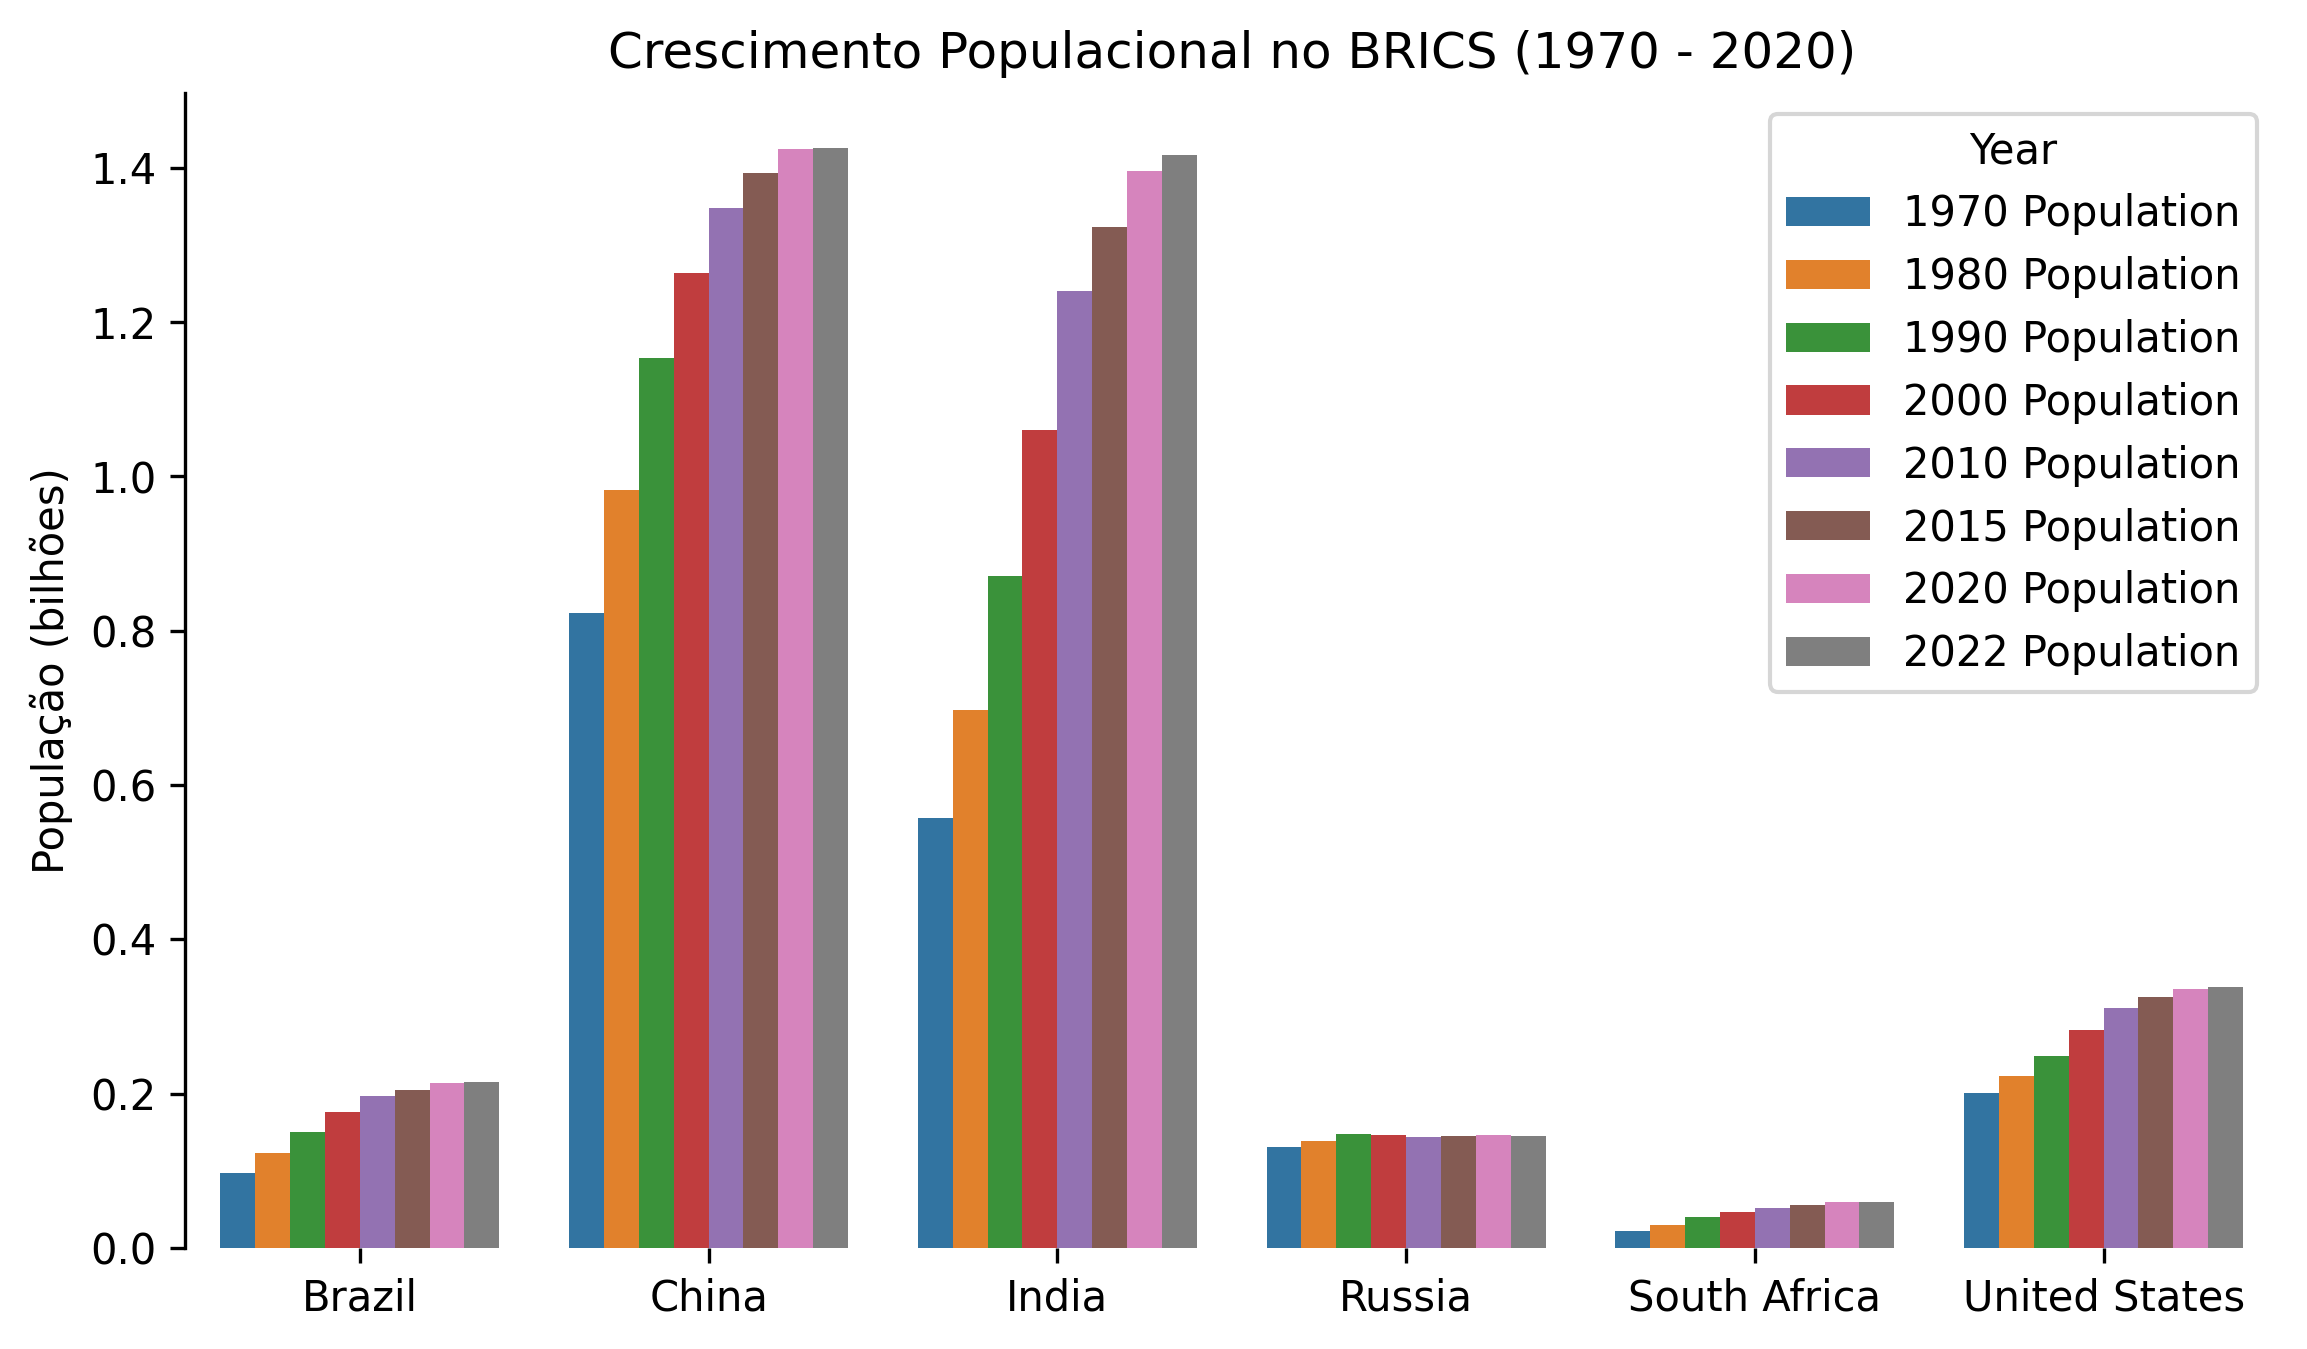

In [24]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.ticklabel_format(style="plain", useLocale=True)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')
plt.ylabel('População (bilhões)')

plt.show()

### Passo 5 - Colocando foco nos dados

Agora que trabalhamos na formatação inicial, precisamos realizar melhorias que irão nos ajudar a colocar o foco nos dados. Eis o que vamos fazer:
- diminuir a legenda
- Alinhar o título a esquerda - o título centralizado faz com que os olhos façam um escaneamento extra do gráfico, dificultando a compreensão
- vamos colocar os valores em cima de cada barra. Também para evitar que precisemos olhar no eixo a esquerda para ver o valor de cada barra, ou seja, que fiquemos constantemente escaneando o gráfico
- ajustar o tamanho das fontes
- ajustar as cores.

#### Diminuindo a legenda

A princípio, podemos resolver isso manipulando os dados.

In [26]:
brics_us['Year'] = brics_us['Year'].apply(lambda x: x.replace(' Population',''))

Vamos ver o resultado?

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/1234354454.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


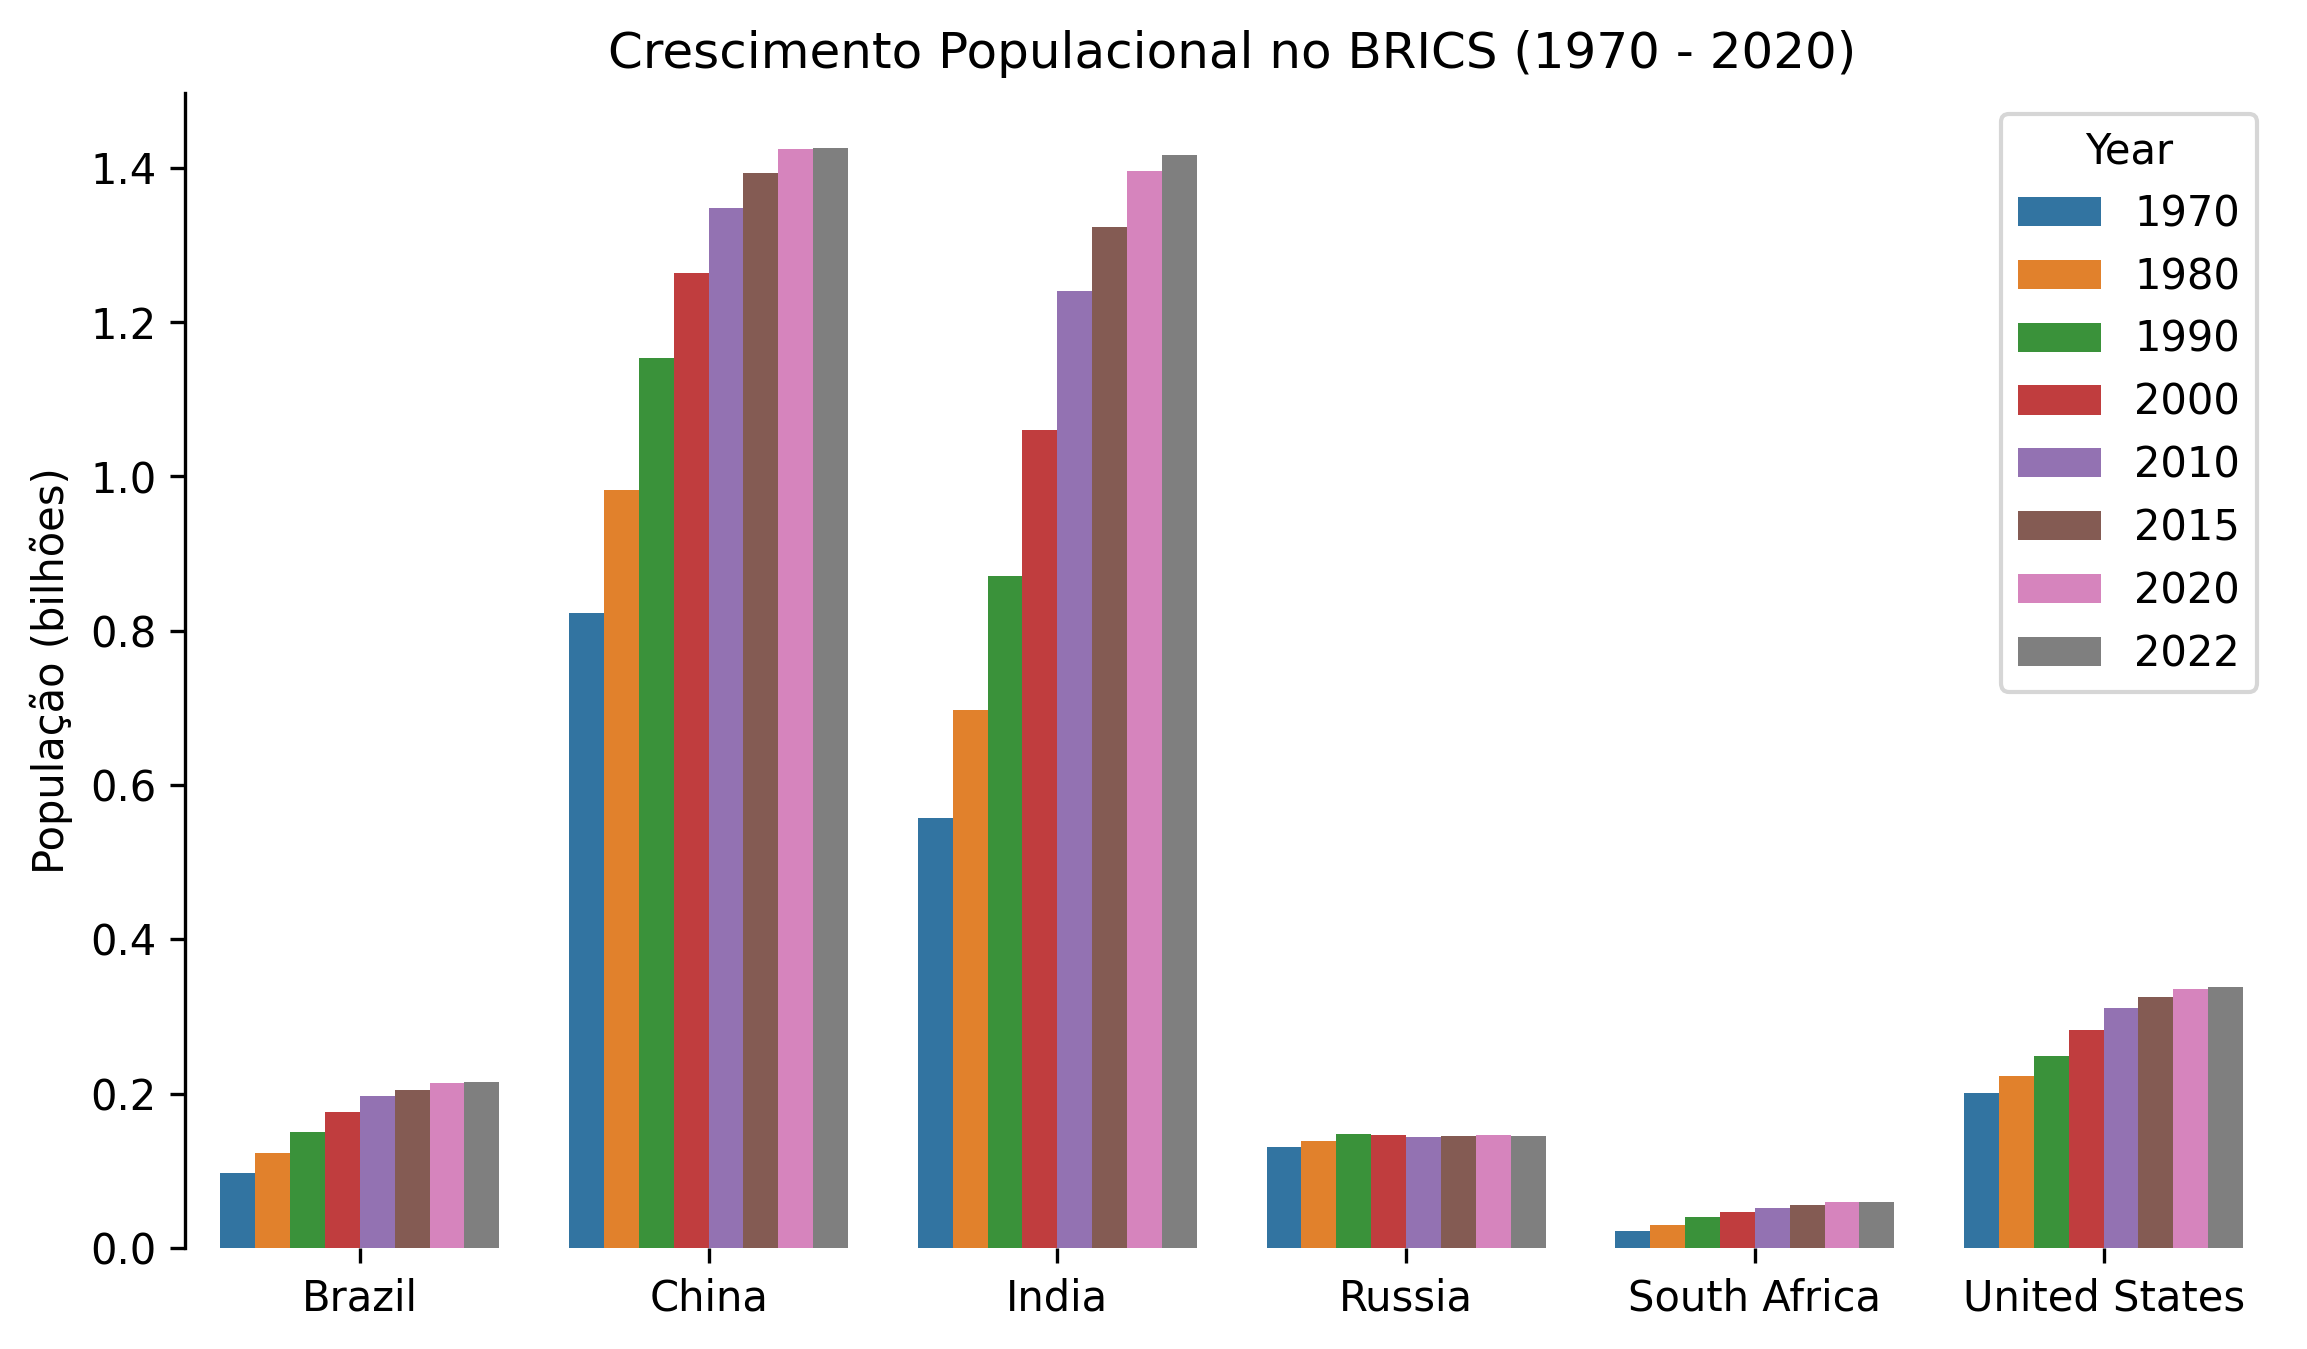

In [27]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

plt.ticklabel_format(style="plain", useLocale=True)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')
plt.ylabel('População (bilhões)')

plt.show()

#### Alinhar o Titulo e Diminuir fontes

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/1419233821.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


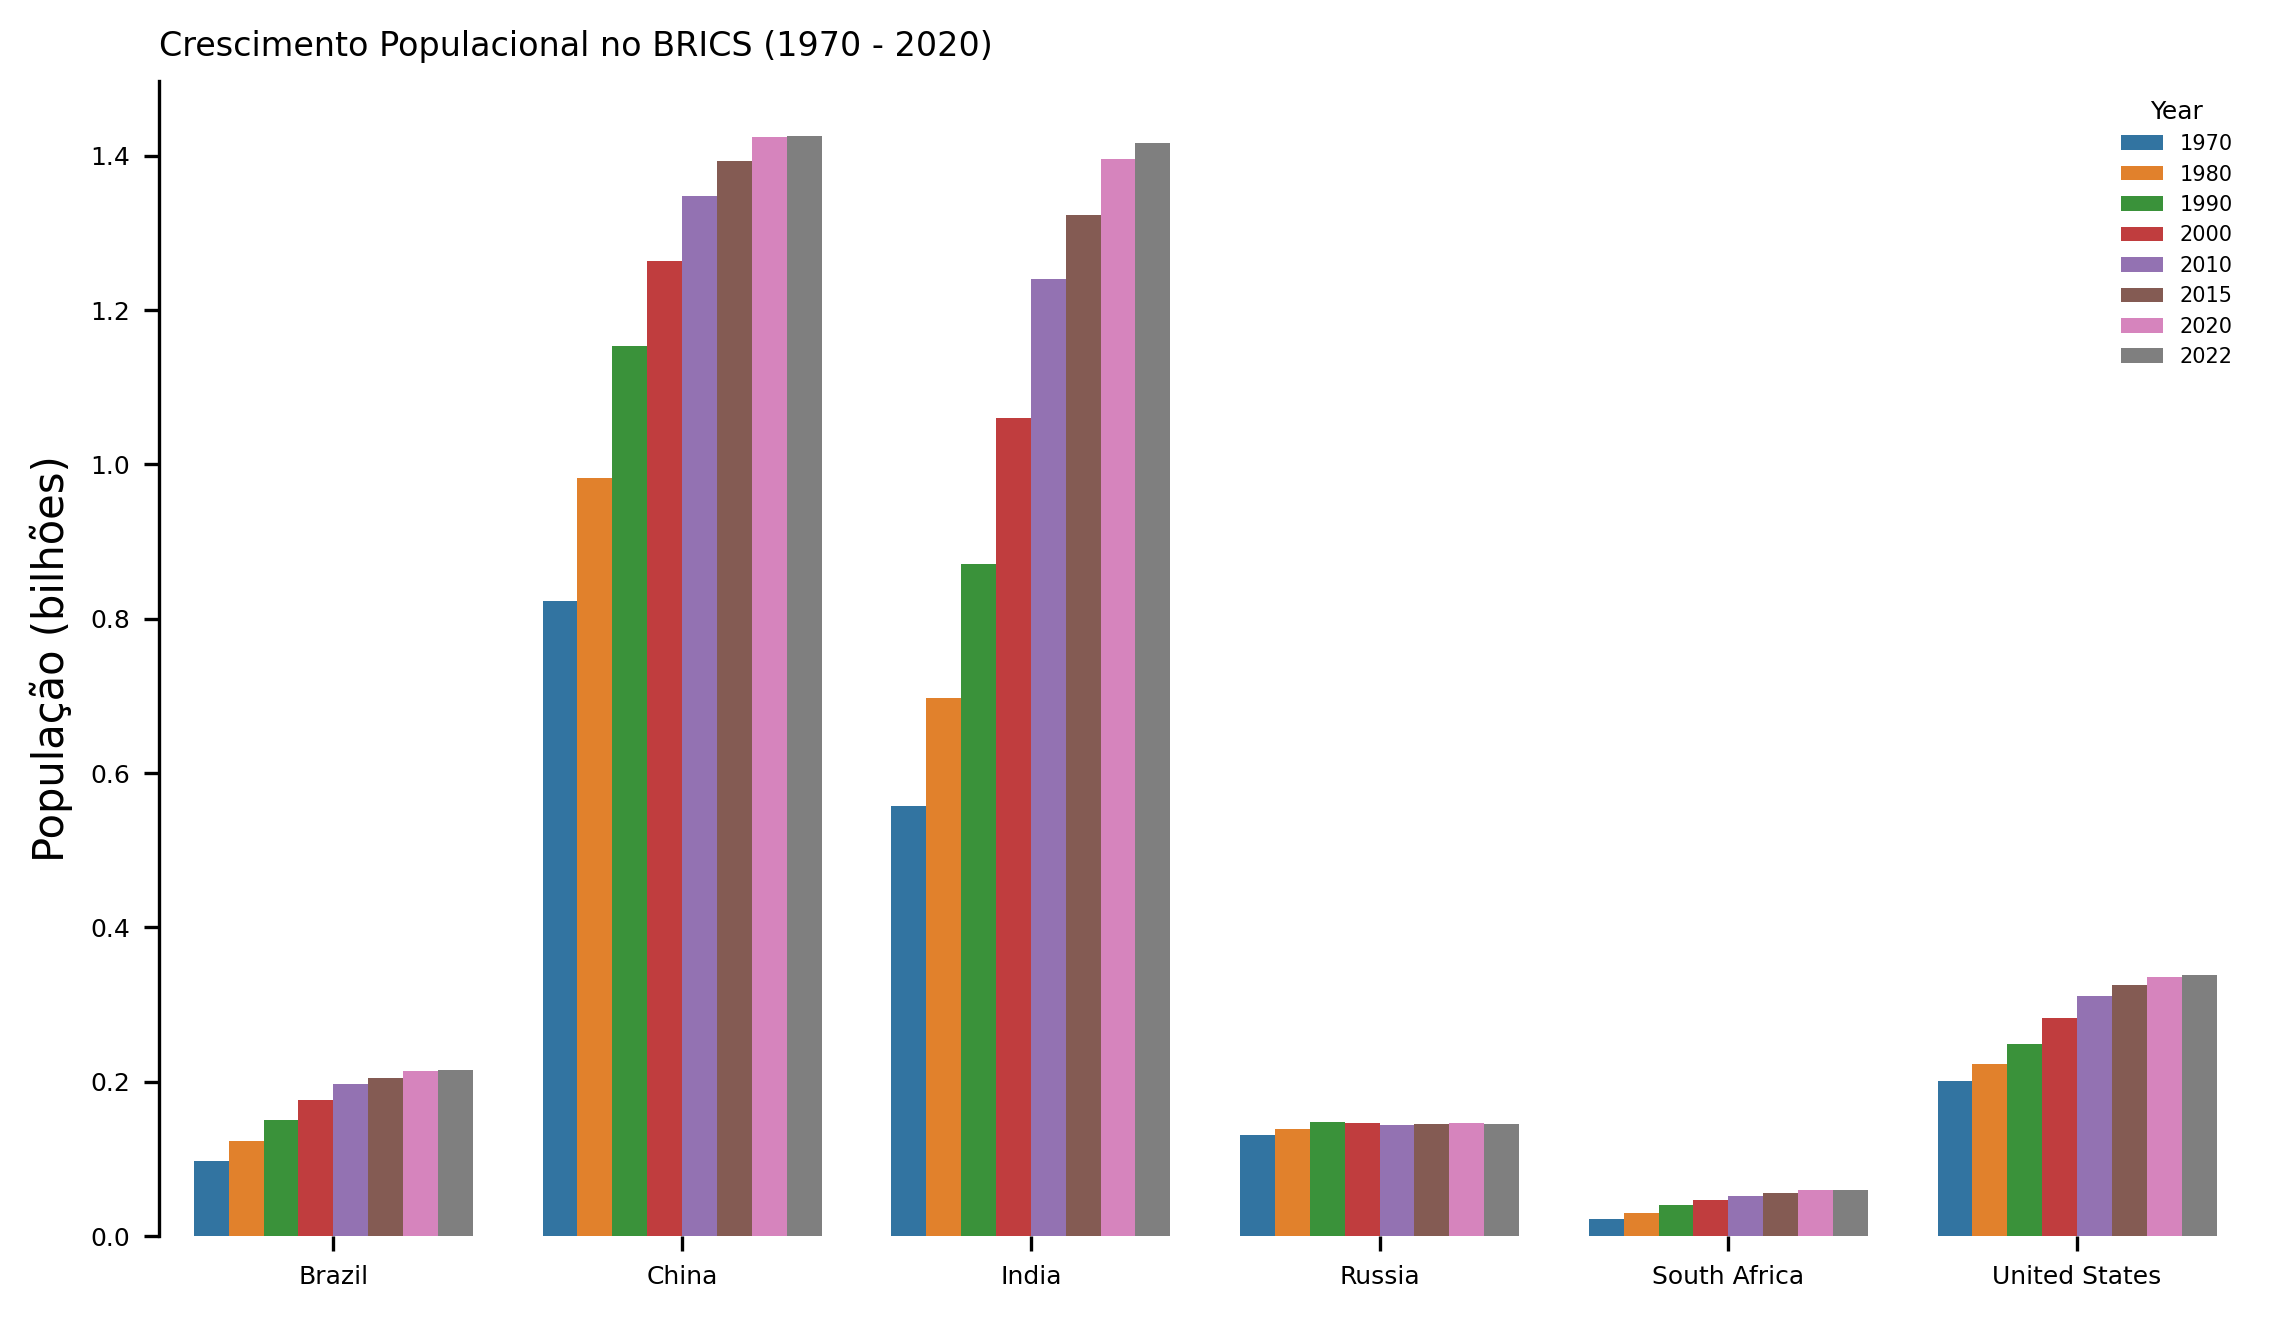

In [29]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

#Fontes
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

plt.ticklabel_format(style="plain", useLocale=True)
plt.tick_params(axis='both', which='major', labelsize=6)

sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)', fontsize=8, loc='left')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')
plt.ylabel('População (bilhões)')

plt.show()

#### Removendo o eixo Y e adicionando os valores nas barras

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/1997790246.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);


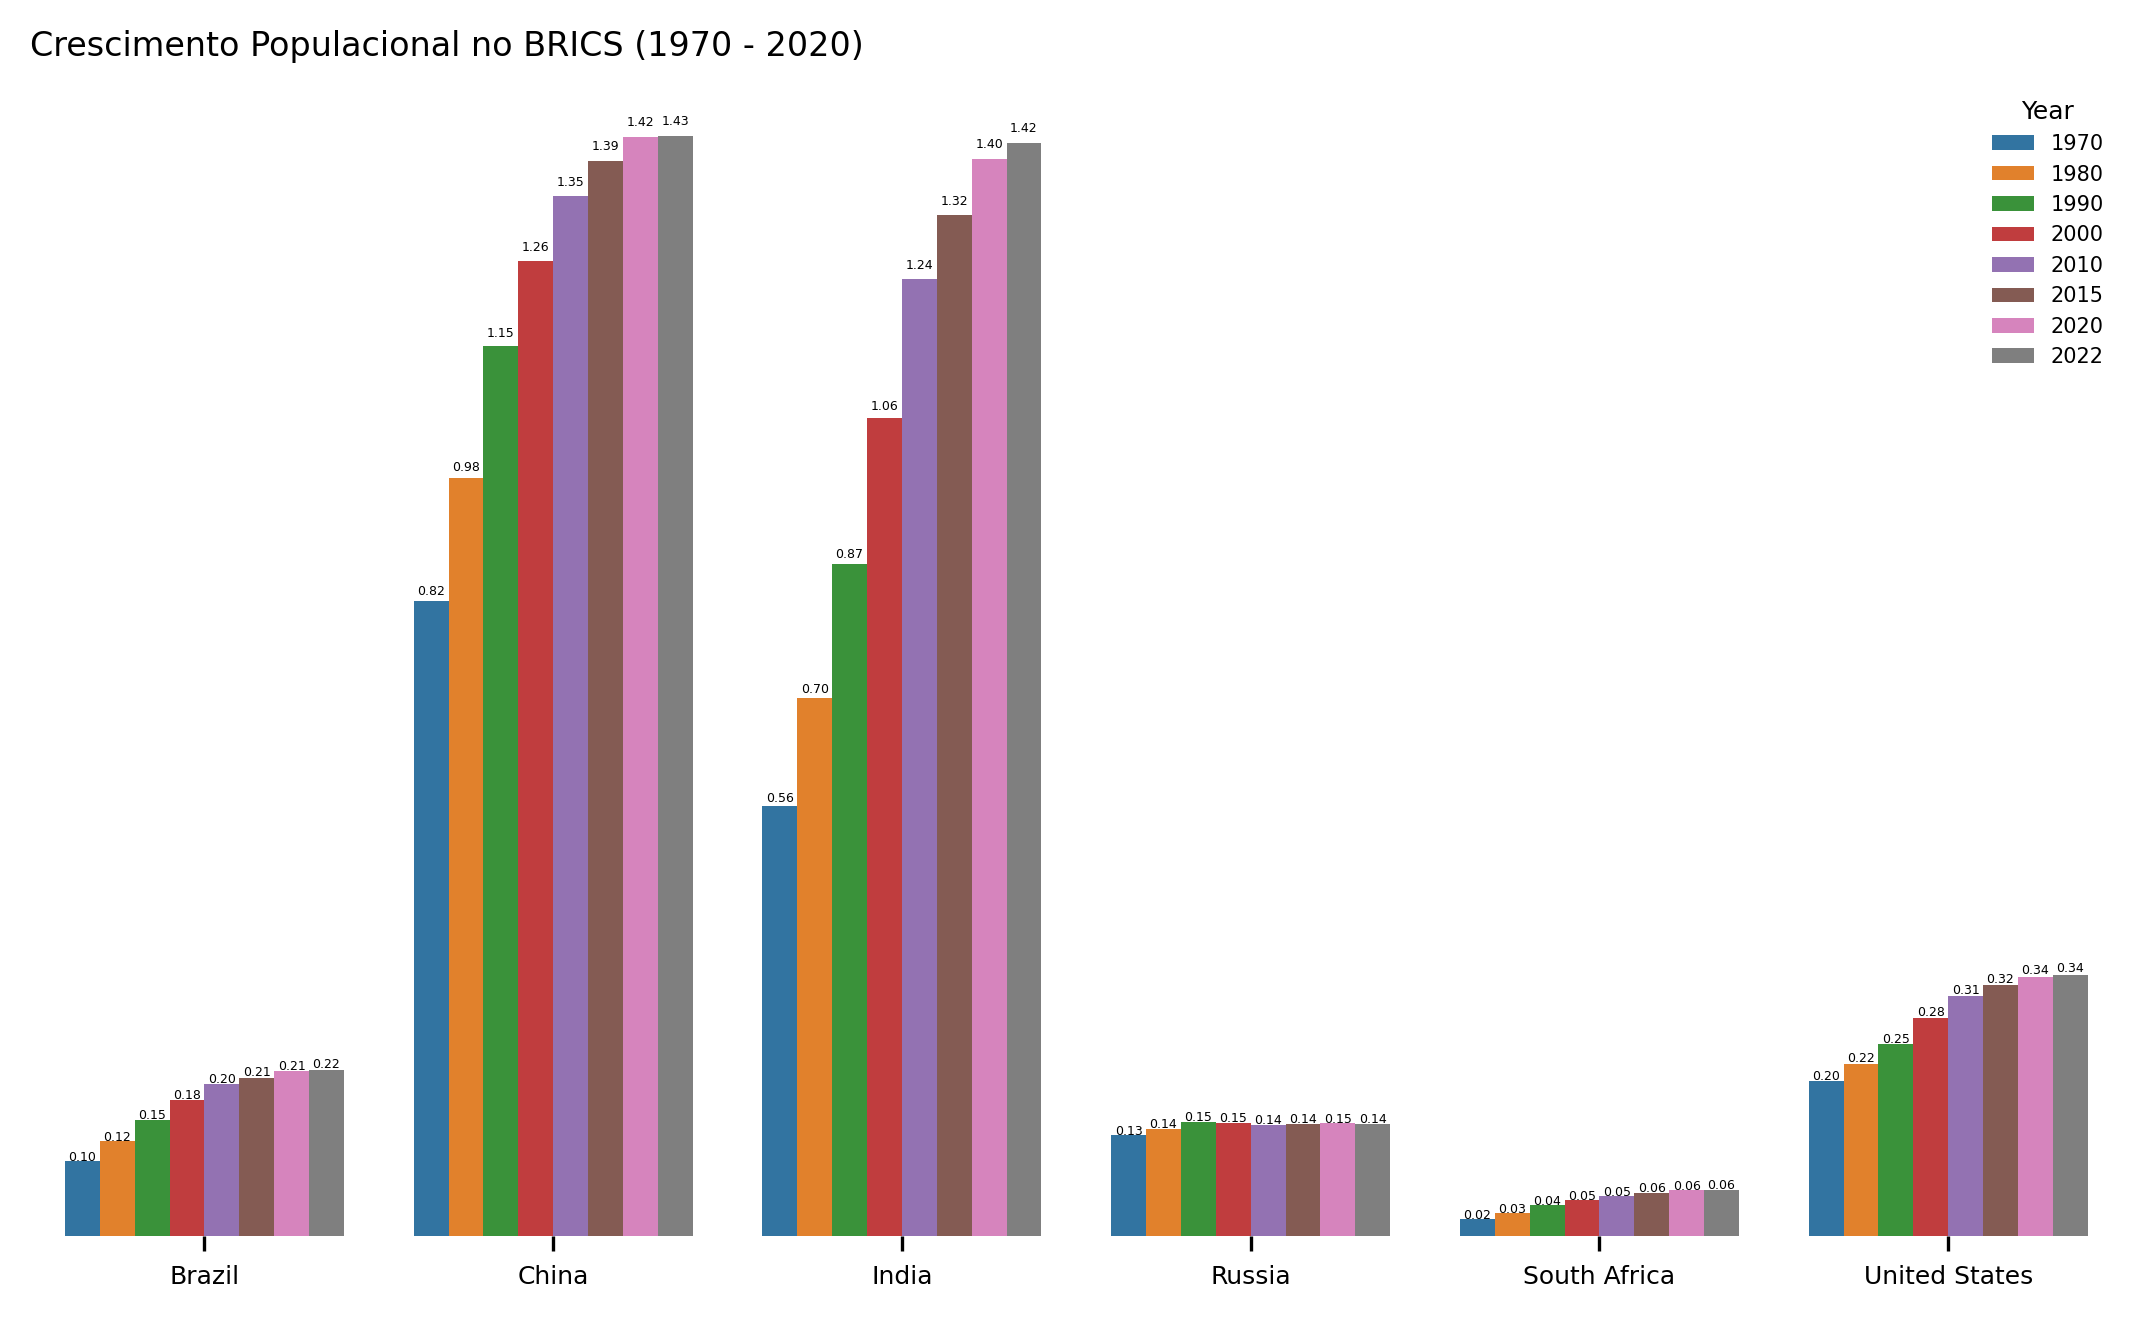

In [32]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

#Fontes
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

plt.ticklabel_format(style="plain", useLocale=True)
plt.tick_params(axis='both', which='major', labelsize=6)

sx = sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in current_values/1000000000]);

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)', fontsize=8, loc='left')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

plt.show()

#### Acertando as cores

A paleta de cores precisa ser ajustada para respeitar as cores da empresa.

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/4070811810.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(formatted_values)


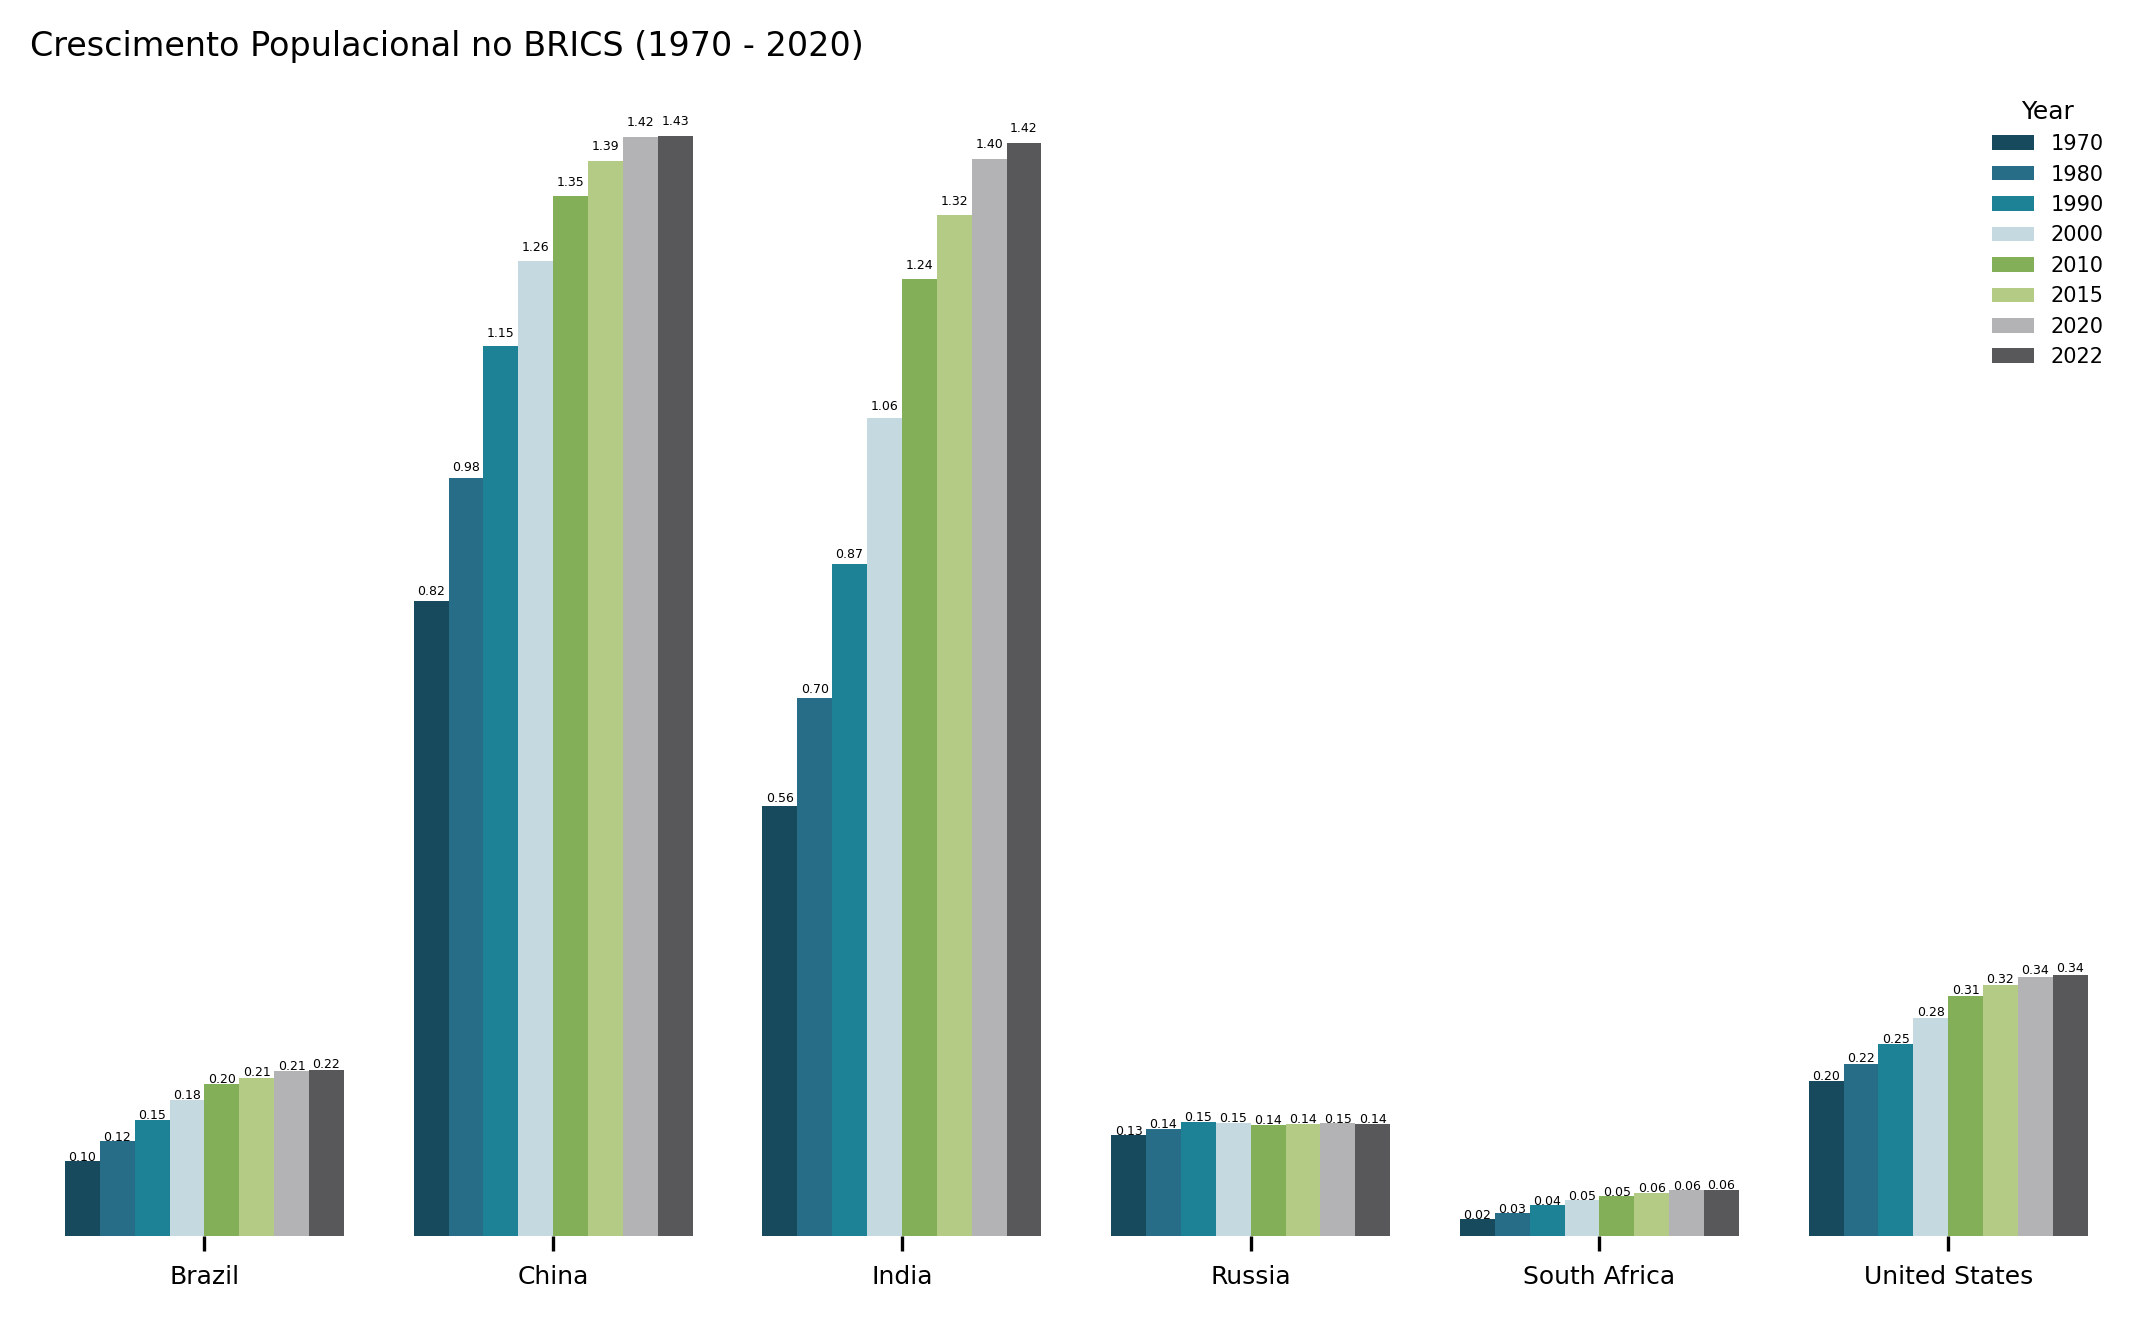

In [35]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Definindo a paleta de cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a", "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091", "#e26c54", "#b0391e"]
sns.set_palette(sns.color_palette(cores))

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

#Fontes
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

plt.ticklabel_format(style="plain", useLocale=True)
plt.tick_params(axis='both', which='major', labelsize=6)

sx = sns.barplot(brics_us, x='Country', y='Population', hue='Year')

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks().tolo
formatted_values = ['{:,.1f}'.format(x/1000000000) for x in current_values]
plt.gca().set_yticklabels(formatted_values)

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)', fontsize=8, loc='left')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=3) 

plt.show()

E aí está o nosso gráfico, com suas cores modificadas. Para este gráfico ficar realmente bom, faltam apenas duas correções: deixar nossas barras um pouco mais largas para que possamos aumentar a fonte dos valores.

/var/folders/fc/hns7cg2j2xg_05kdl6cbxkw40000gn/T/ipykernel_47418/1546591451.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(formatted_values)


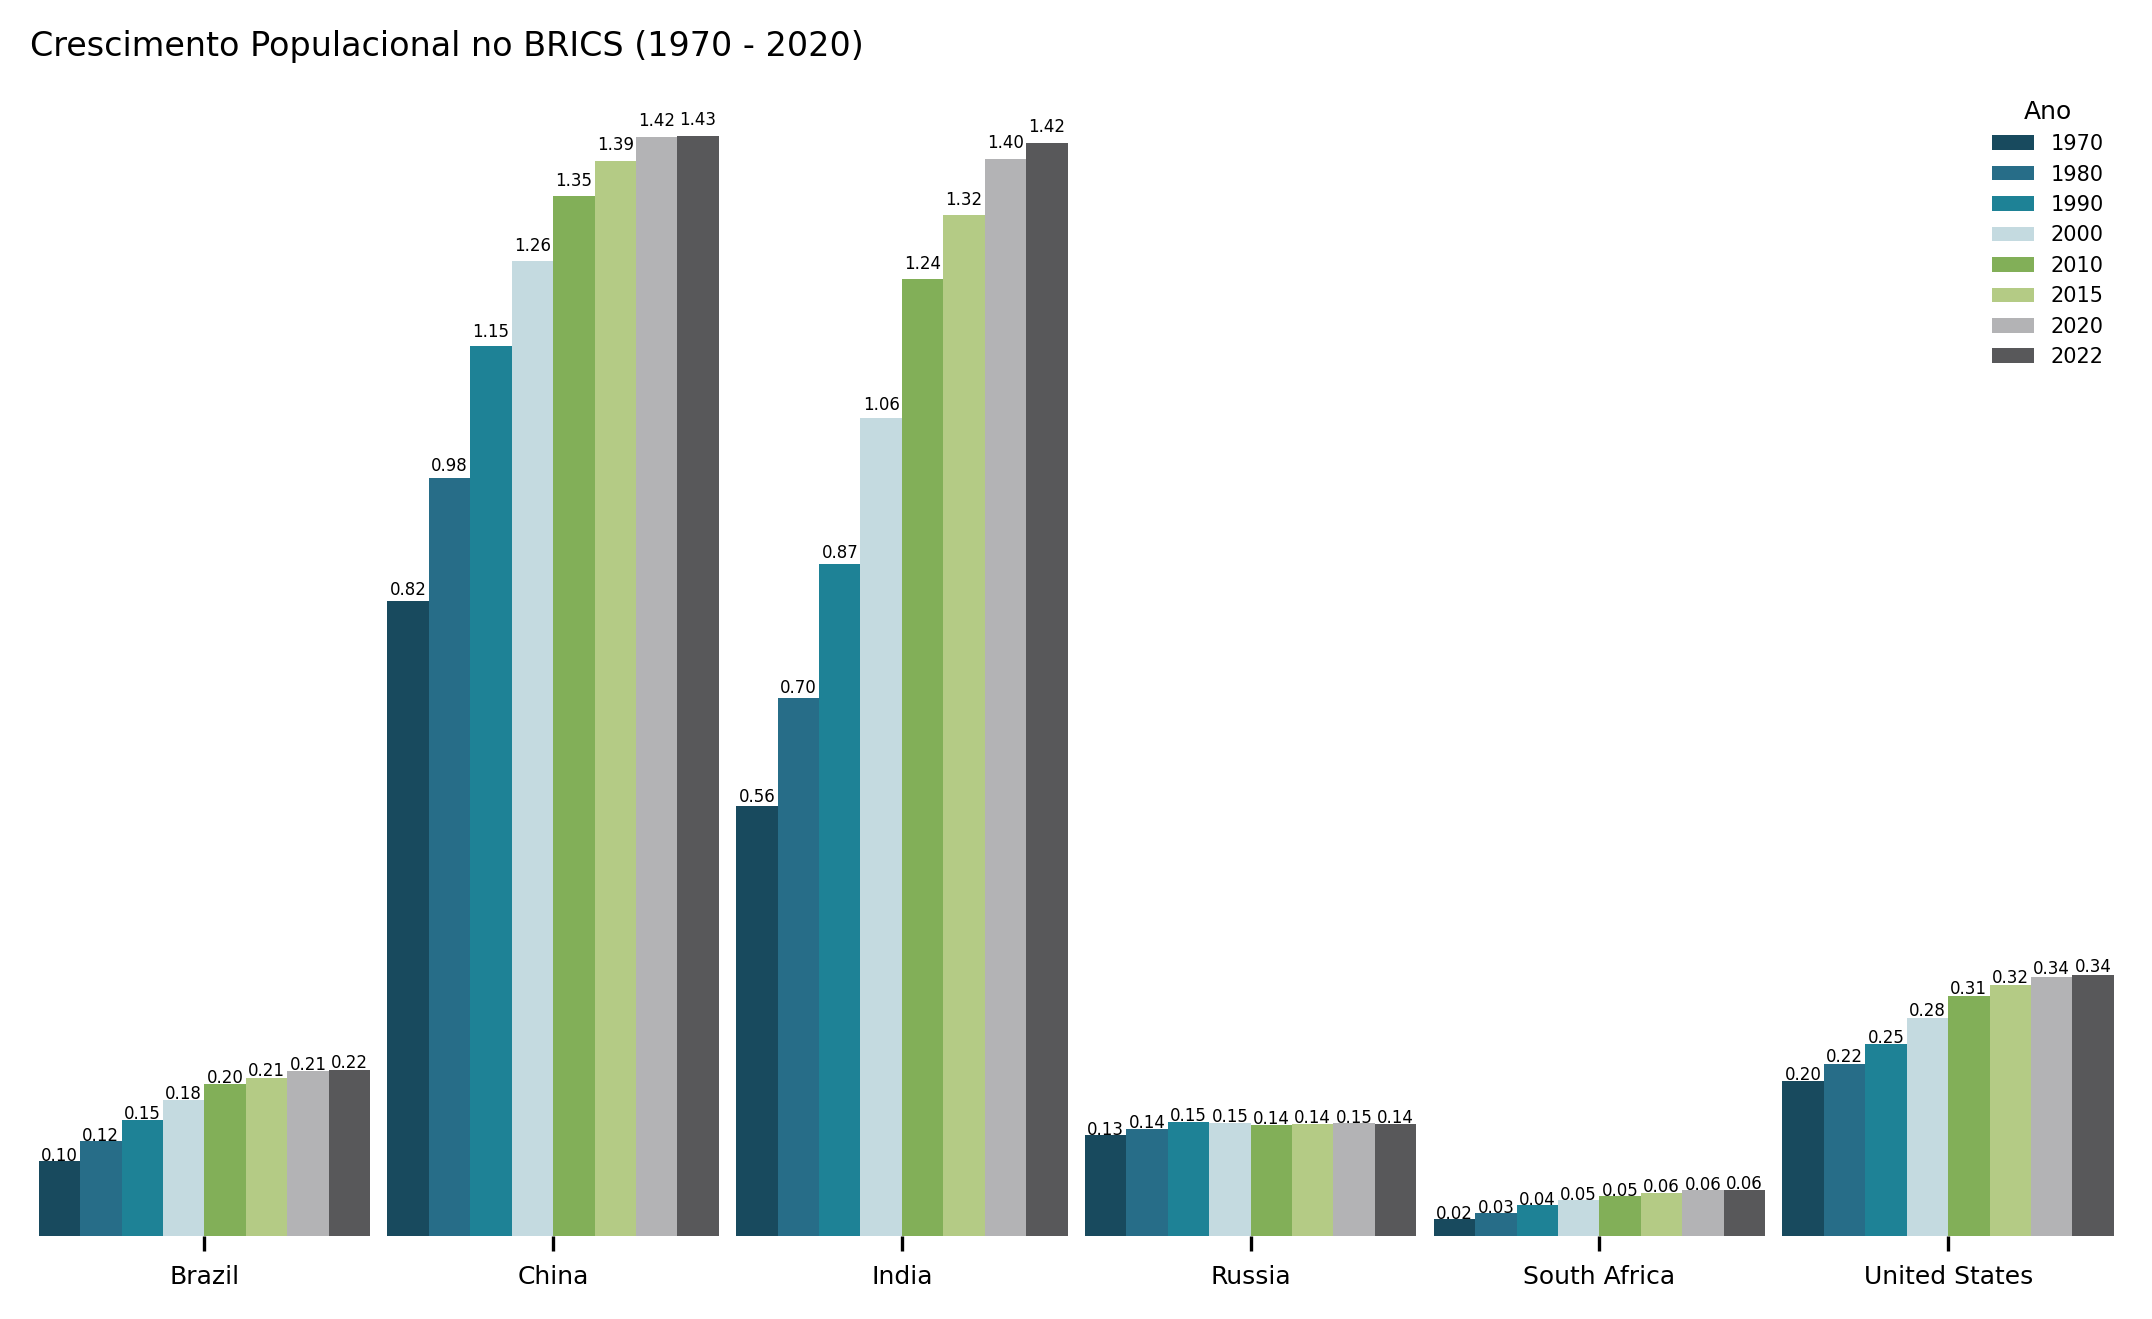

In [43]:
# É aconselhavel mudar o tamanho da imagem antes de plotar
# Para tanto, o MatPlotLib nos permite modificar entradas 
# em um dicionário de parâmetros chamado rcParams.
# A nossa modificação será da entrada figure.figsize
# Este parâmetro recebe uma tupla com largura e altura em polegadas
# O valor padrão é 6.4 de largura e 4.8 de altura em polegadas
plt.rcParams["figure.figsize"] = (9,5)

#Definindo a paleta de cores
cores = ["#0c4f6a", "#177498", "#0a8faa", "#bfdce5", "#82bd4a", "#b8d67a", "#b2b3b6", "#58585a", "#edb634", "#d97933", "#f1bdb1", "#eca091", "#e26c54", "#b0391e"]
sns.set_palette(sns.color_palette(cores))

#Ajustando qualidade da imagem
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "svg"

# Para remover parte do box da imagem, fazemos isso:
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False

#Fontes
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams["legend.frameon"] = False

plt.ticklabel_format(style="plain", useLocale=True)
plt.tick_params(axis='both', which='major', labelsize=6)

# O padrão para tamanho das barras é 0.8. Quando colocamos 1, as barras se encostam. 
# Portanto, aumentamos para 0.95 para que não se encostem, mas fiquem mais largas.
# A nossa outra alteração foi na rotina que imprime os valores, onde pudemos ajustar
# o tamanho da fonte de 3 para 4
sx = sns.barplot(brics_us, x='Country', y='Population', hue='Year', width=0.95)

# Aqui buscamos os valores que foram adicionados no eixo e os modificamos 
# com a formatação adequada
current_values = plt.gca().get_yticks().tolist()
formatted_values = ['{:,.1f}'.format(x/1000000000) for x in current_values]
plt.gca().set_yticklabels(formatted_values)

# Esta função adiciona um título no gráfico
plt.title('Crescimento Populacional no BRICS (1970 - 2020)', fontsize=8, loc='left')

# Estas funções nos permitem alterar o títulos nos eixos
plt.xlabel('')

# Removendo todo o eixo Y
sx.get_yaxis().set_visible(False)

# O Objeto patches contém todos os elementos (neste caso barras) que foram plotados no gráfico
# Então percorremos eles e fazemos os seguintes calculos:
# a coordenada x para posicionar o texto = Coordenada X do canto superior da barra + largura da barra / 2
# a coordenada Y para posicionar o texto = Coordenada Y do canto superior da barra + 1% desta altura
for p in sx.patches:
  _x = (p.get_x() + p.get_width() / 2)
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.2f}'.format(p.get_height()/1000000000)
  sx.text(_x, _y, value, ha="center", size=4) 

# Essa alteração foi no improviso, pois estava dizendo Year, ou seja,
# uma parte do gráfico utilizava um idioma diferente.
plt.legend(title='Ano')

plt.show()

Acho que agora, estamos prontos para enviar esse belo gráfico para quem vai usá-lo!

## Conclusão

Nesta aula, aprendemos sobre como configurar nossos gráficos para que fiquem com uma aparência mais profissional e respeitem as boas práticas da área de Visualização de Dados. Vamos deixar também os links para as documentações das bibliotecas que utilizamos:
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/stable/index.html)

### Navegação

| [< Anterior](/posts/data-109/index.html) 	| \| | [Próximo >](/posts/data-111/index.html) 	|
|---------- |---|--------:	|